In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from sklearn import model_selection

In [2]:
dataset = pd.read_csv('cardio_train.csv', delimiter=";")
# dataset is a csv file divided by ";"

In [3]:
dataset.shape

(70000, 13)

In [4]:
dataset.index

RangeIndex(start=0, stop=70000, step=1)

In [5]:
dataset.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
dataset.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
# Initial Univariate Analysis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


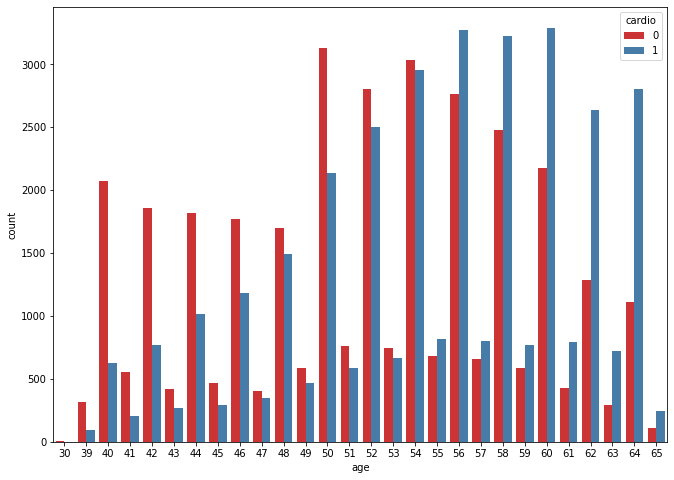

In [10]:
rcParams['figure.figsize'] = 11, 8
age_form = (dataset['age'] / 365).round().astype('int')
sns.countplot(x=age_form, hue='cardio', data = dataset, palette="Set1");

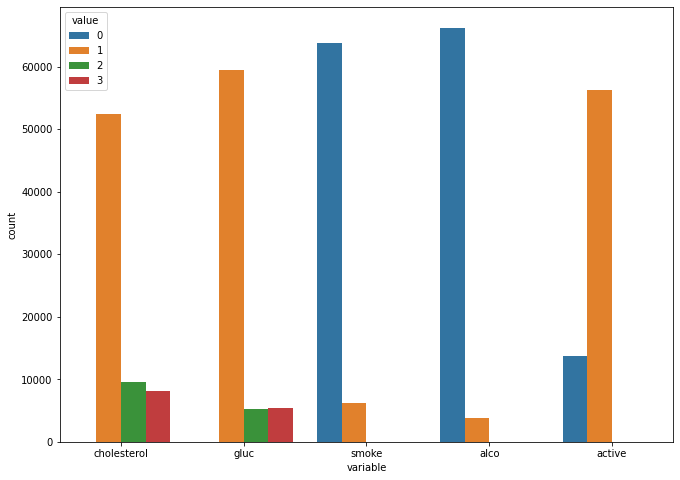

In [11]:
categorical_set = dataset.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(categorical_set));

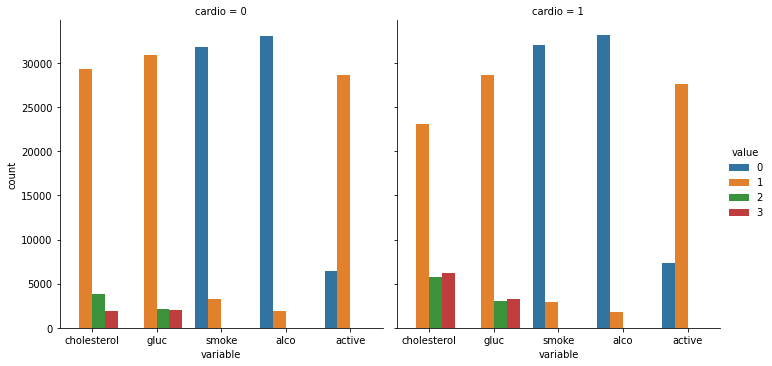

In [12]:
dataset_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=dataset_long, kind="count");

In [13]:
dataset.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [14]:
dataset['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [15]:
dataset.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [16]:
dataset.groupby('gender')['weight'].mean()

gender
1    72.565605
2    77.257307
Name: weight, dtype: float64

In [17]:
dataset.groupby('gender')['ap_hi'].mean()

gender
1    128.139249
2    130.078872
Name: ap_hi, dtype: float64

In [18]:
dataset.groupby('gender')['ap_lo'].mean()

gender
1     94.522776
2    100.551982
Name: ap_lo, dtype: float64

In [19]:
dataset['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

<AxesSubplot:>

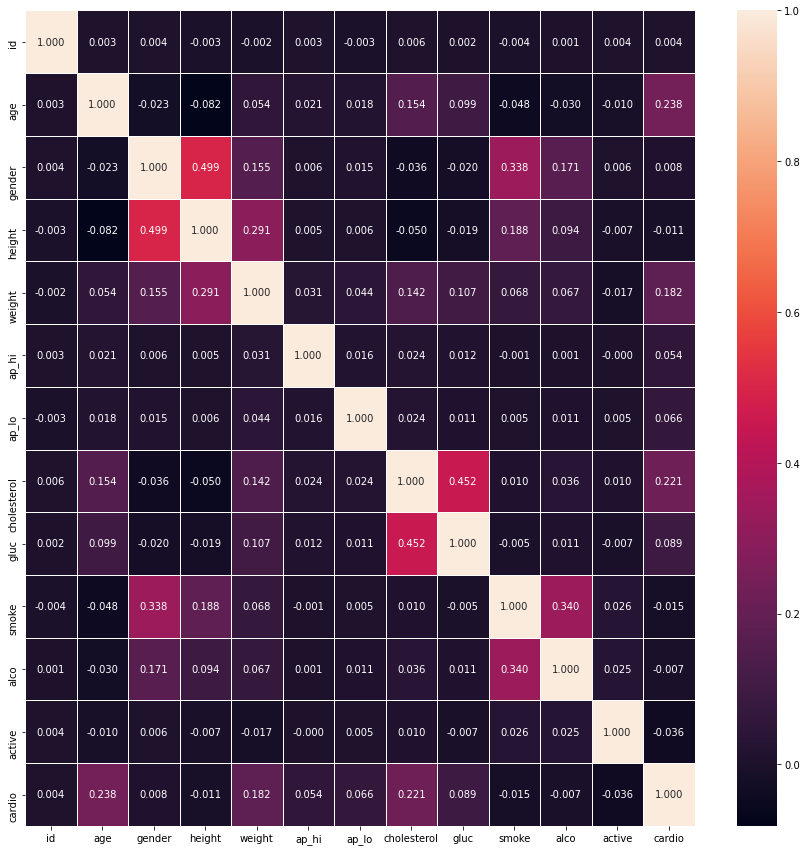

In [20]:
correlation = dataset.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [21]:
# Check for missing values
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
# Check for NaN values
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [23]:
# Check for duplicates
duplicated_records = dataset[dataset.duplicated()]
print("Duplicated Rows: ", duplicated_records.shape)

Duplicated Rows:  (0, 13)


In [24]:
# Clear duplicates
dataset.drop_duplicates(inplace=True)
dataset.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


In [25]:
dataset.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [26]:
# The age column were in days
dataset['age'] = (dataset['age'] / 365).round().astype('int')
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
#sns.scatterplot(x='age', y='weight', hue='cardio', data= dataset)

In [28]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='height'>

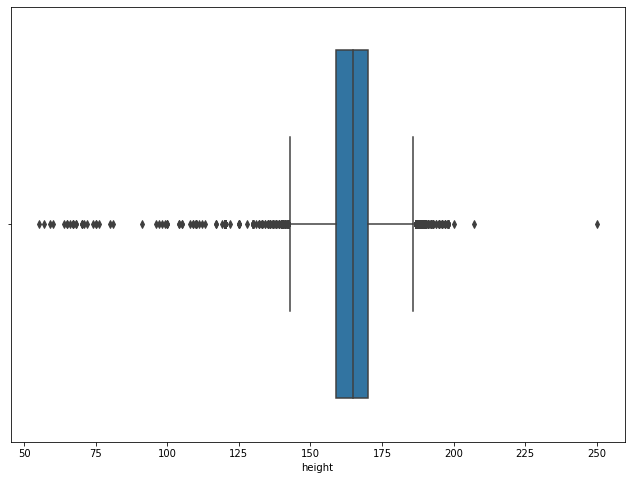

In [29]:
# Based on the data described, there seems to be abnormal data in height (max:250cm)
# Boxplot is used to identify the outlier
sns.boxplot(x=dataset['height'])

In [30]:
# Display records where height is more than 200 
dataset[dataset['height']>200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,58,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,52,2,207,78.0,100,70,1,1,0,1,1,0


In [31]:
# Remove abnormal data where height does not coorelate to the weight
dataset.drop(index=6486, inplace= True)

<AxesSubplot:xlabel='weight'>

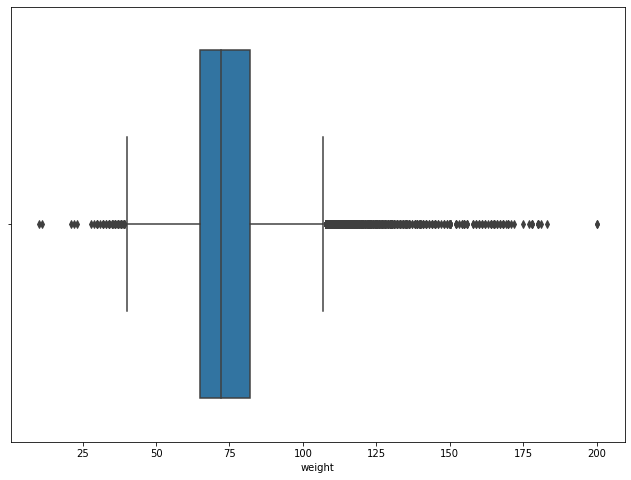

In [32]:
sns.boxplot(x=dataset['weight'])

In [33]:
dataset[dataset['weight']>175]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,618,46,1,186,200.0,130,70,1,1,0,0,0,0
2441,3438,53,2,177,177.0,130,90,1,1,0,0,1,1
4743,6716,47,2,176,180.0,140,90,1,1,0,0,1,1
20092,28683,57,2,165,178.0,120,80,1,1,1,1,1,0
27384,39156,42,1,80,178.0,140,90,3,3,0,0,1,1
36780,52564,54,1,161,181.0,180,1100,2,1,0,0,1,1
45378,64829,48,2,190,180.0,140,80,2,2,0,0,1,1
50413,71945,41,2,180,200.0,150,90,1,1,0,0,1,1
60592,86506,52,2,180,180.0,140,100,3,1,0,0,1,1
61285,87498,57,2,180,183.0,110,80,3,3,0,1,1,1


<AxesSubplot:xlabel='age'>

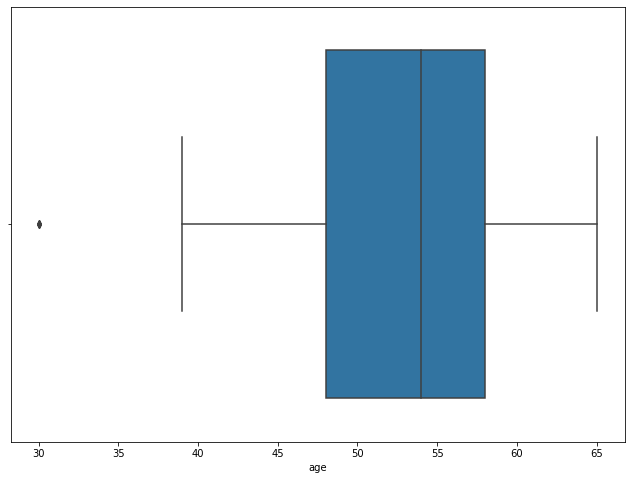

In [34]:
sns.boxplot(x=dataset['age'])

In [35]:
# Based on the age distribution, certain records have suspicious height associated
dataset[dataset['height'] < 125]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,309,60,2,76,55.0,120,80,1,1,0,0,1,0
3420,4838,40,1,100,70.0,100,70,1,1,0,0,1,0
3735,5278,48,1,120,70.0,120,70,1,1,0,0,1,0
3752,5306,42,1,120,30.0,110,70,1,1,0,0,1,0
4212,5946,44,1,120,80.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65302,93223,51,1,99,60.0,90,60,1,1,0,0,1,0
66023,94249,40,1,120,80.0,120,70,2,1,0,0,1,0
66479,94906,46,2,110,90.0,110,90,1,1,0,0,1,0
66643,95141,52,1,57,61.0,130,90,1,1,0,0,1,1


In [36]:
dataset = dataset[dataset['height'] >= 125]

In [37]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000,69912.000000
mean,49971.568057,53.340099,1.349554,164.436263,74.196071,128.826110,96.638975,1.367004,1.226556,0.088154,0.053796,0.803825,0.499728
std,28850.194915,6.764653,0.476832,7.865565,14.366283,154.105892,188.558662,0.680321,0.572360,0.283520,0.225617,0.397105,0.500004
min,0.000000,30.000000,1.000000,125.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25009.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74882.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='weight', ylabel='height'>

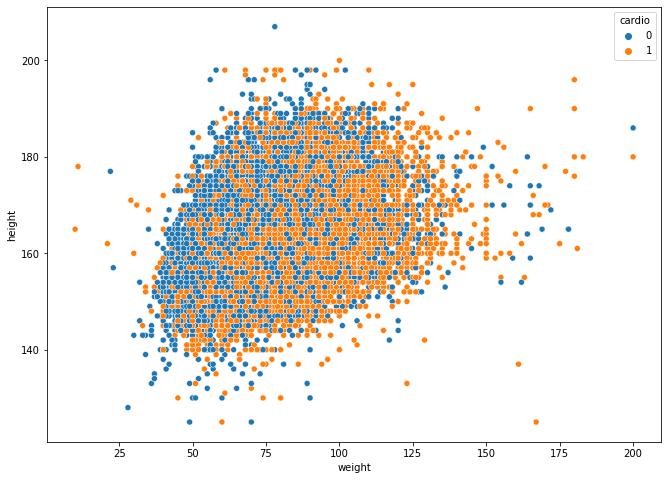

In [38]:
sns.scatterplot(data=dataset, x="weight",y="height", hue=dataset["cardio"])

In [39]:
dataset[dataset['weight'] < 25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
26806,38312,64,1,157,23.0,110,80,1,1,0,0,1,0
29488,42156,56,2,177,22.0,120,80,1,1,1,1,1,0
33817,48318,59,2,178,11.0,130,90,1,1,0,0,1,1
57858,82567,52,2,165,10.0,180,1100,2,2,0,0,1,1
60188,85931,60,1,162,21.0,120,80,2,1,0,0,1,1


In [40]:
dataset[dataset['weight'] > 175]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,618,46,1,186,200.0,130,70,1,1,0,0,0,0
2441,3438,53,2,177,177.0,130,90,1,1,0,0,1,1
4743,6716,47,2,176,180.0,140,90,1,1,0,0,1,1
20092,28683,57,2,165,178.0,120,80,1,1,1,1,1,0
36780,52564,54,1,161,181.0,180,1100,2,1,0,0,1,1
45378,64829,48,2,190,180.0,140,80,2,2,0,0,1,1
50413,71945,41,2,180,200.0,150,90,1,1,0,0,1,1
60592,86506,52,2,180,180.0,140,100,3,1,0,0,1,1
61285,87498,57,2,180,183.0,110,80,3,3,0,1,1,1
61362,87612,46,2,196,180.0,130,80,3,1,0,0,1,1


In [41]:
# Remove records with abnormal weight outliers
dataset.drop(index=list(dataset[dataset['weight']<25].index),inplace=True)
dataset.drop(index=list(dataset[dataset['weight']>175].index),inplace=True)

In [42]:
dataset.drop('id', inplace=True, axis=1)
dataset.head()
# Dropping ID number column

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [43]:
dataset.count()

age            69896
gender         69896
height         69896
weight         69896
ap_hi          69896
ap_lo          69896
cholesterol    69896
gluc           69896
smoke          69896
alco           69896
active         69896
cardio         69896
dtype: int64

In [44]:
# Dropping the ap_hi outlier values over 250 and ap_lo outlier values over 200

# A healthy man should have below 120 systolic blood pressure, and anything above 180 
# indicates hypertensive crisis

# Similarly, diastolic blood pressure is expected to be less than 80 for
# any healthy person and any measurements higher than 120 indicates hypertensive crisis too

dataset = dataset[dataset['ap_hi'] < 250]
dataset = dataset[dataset['ap_lo'] < 200]

In [45]:
# Both systolic and diastolic blood pressure cannot be negative, so the negative values are removed
dataset = dataset[dataset['ap_hi'] > 0]
dataset = dataset[dataset['ap_lo'] > 0]

In [46]:
dataset[dataset['ap_hi'] > 80]
print("{}".format(dataset[dataset['ap_hi'] > 80].count()))

age            68589
gender         68589
height         68589
weight         68589
ap_hi          68589
ap_lo          68589
cholesterol    68589
gluc           68589
smoke          68589
alco           68589
active         68589
cardio         68589
dtype: int64


<AxesSubplot:xlabel='ap_hi'>

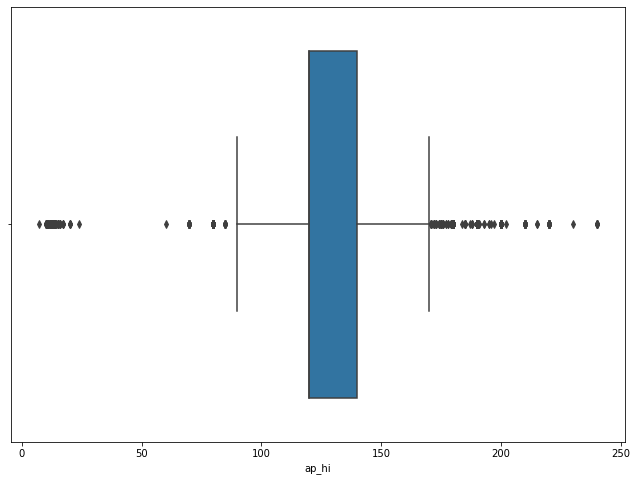

In [47]:
sns.boxplot(x=dataset["ap_hi"])

<AxesSubplot:xlabel='ap_lo'>

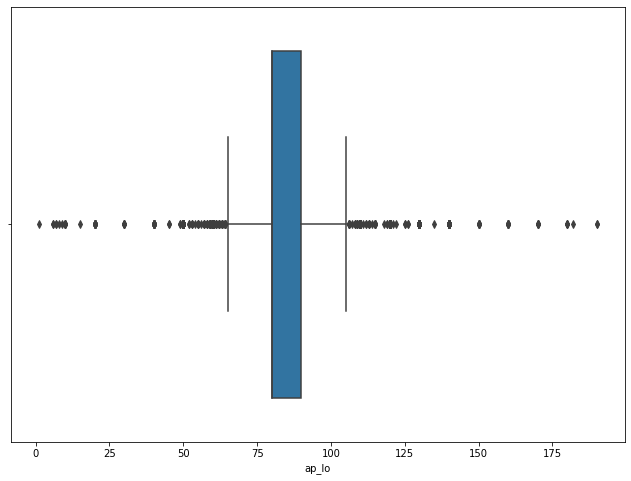

In [48]:
sns.boxplot(x=dataset["ap_lo"])

In [49]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000
mean,53.326593,1.348572,164.434774,74.096291,126.330832,81.352535,1.364482,1.225974,0.087872,0.053583,0.803336,0.494904
std,6.767147,0.476521,7.853542,14.232585,17.690648,9.801934,0.678723,0.571912,0.283111,0.225194,0.397479,0.499978
min,30.000000,1.000000,125.000000,28.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,207.000000,172.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Feature engineering
# bmi = weight /(height / 100) ^ 2
dataset["BMI"] = dataset["weight"] / (dataset["height"]/100)**2

In [51]:
# column renaming, cardio is the target variable, hence, it is not renamed
dataset = dataset.rename(columns={'age':'Age', 'gender':'Gender', 'height':'Height', 'weight':'Weight', 
                                  'ap_hi':'Systolic', 'ap_lo':'Diastolic', 'cholesterol':'Cholesterol', 
                                  'gluc':'Glucose','smoke':'Smoke','alco':'Alcohol', 'active':'Physical Active'})

In [52]:
dataset.describe()

,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical Active,cardio,BMI
count,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000
mean,53.326593,1.348572,164.434774,74.096291,126.330832,81.352535,1.364482,1.225974,0.087872,0.053583,0.803336,0.494904,27.438772
std,6.767147,0.476521,7.853542,14.232585,17.690648,9.801934,0.678723,0.571912,0.283111,0.225194,0.397479,0.499978,5.202100
min,30.000000,1.000000,125.000000,28.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.917581
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,65.000000,2.000000,207.000000,172.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,106.880000


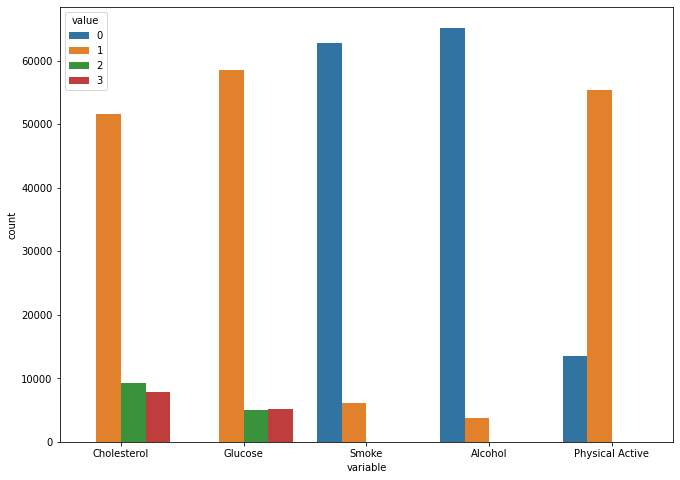

In [53]:
categorical_set = dataset.loc[:,['Cholesterol','Glucose', 'Smoke', 'Alcohol', 'Physical Active']]
sns.countplot(x="variable", hue="value",data= pd.melt(categorical_set));

<AxesSubplot:>

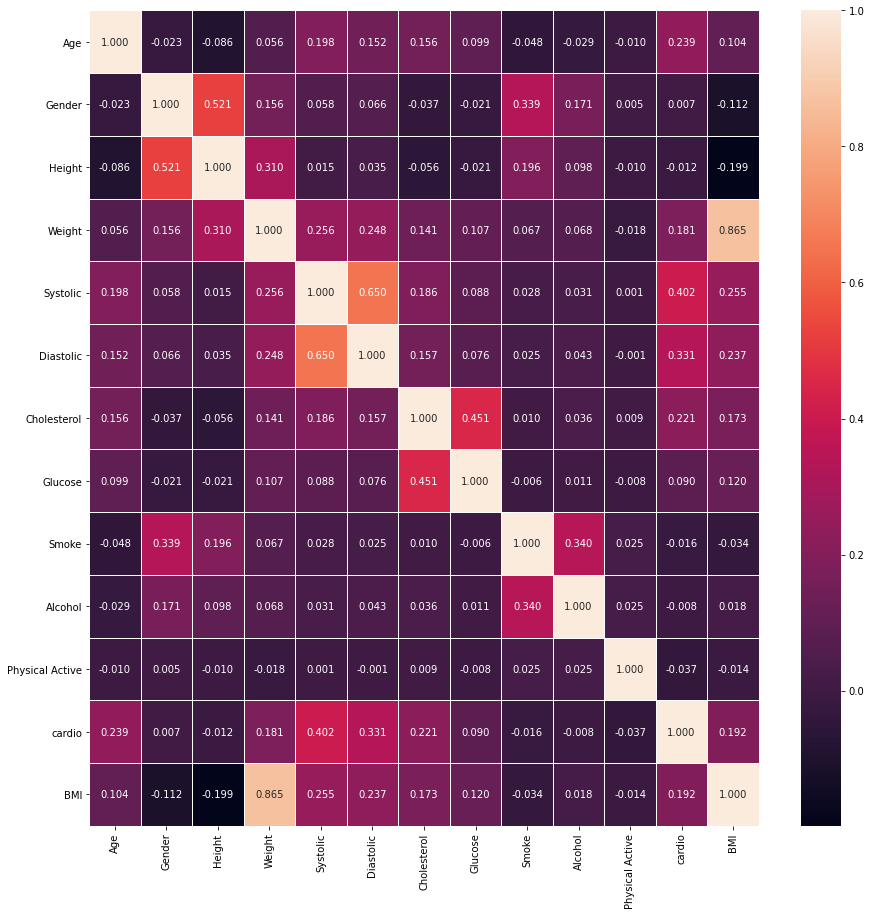

In [54]:
correlation = dataset.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

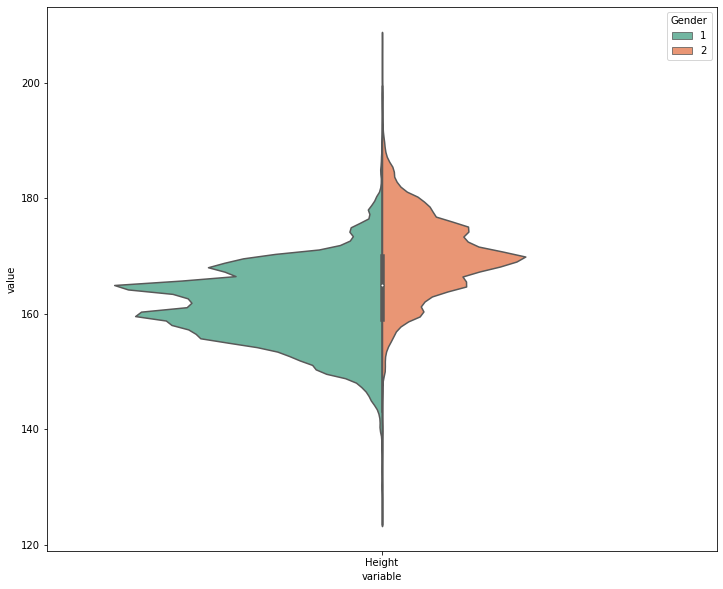

In [55]:
dataset_melt = pd.melt(frame=dataset, value_vars=['Height'], id_vars=['Gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='Gender', 
    split=True, 
    data=dataset_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

In [56]:
X = dataset.drop(['cardio'], axis=1)
Y = dataset['cardio']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# 80% of the dataset is used for training and the remaining 20 is for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 2)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
penalty = ['none','l2']
C=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
solver=['lbfgs','saga']

param_grid = dict(penalty=penalty,C=C,solver=solver)
model = LogisticRegression()

grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,cv=5)

In [60]:
grid_result = grid.fit(X_train, y_train)

/home/pop-user/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [61]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7263142133876123
Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [62]:
model = LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')

In [63]:
model.fit(X_train,y_train)

/home/pop-user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [64]:
# Prediction Score
acc_log = round(model.score(X_train,y_train) * 100, 2)

In [65]:
acc_log

72.66

In [66]:
pred = model.predict(X_test)

In [67]:
print(pred)

[1 0 0 ... 0 0 1]


In [68]:
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6927
           1       0.74      0.67      0.71      6850

    accuracy                           0.72     13777
   macro avg       0.72      0.72      0.72     13777
weighted avg       0.72      0.72      0.72     13777



In [69]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, pred)

In [70]:
cnf_matrix

array([[5308, 1619],
       [2232, 4618]])

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.7204761559120273
Precision: 0.7404200737534071
Recall: 0.6741605839416058


<AxesSubplot:>

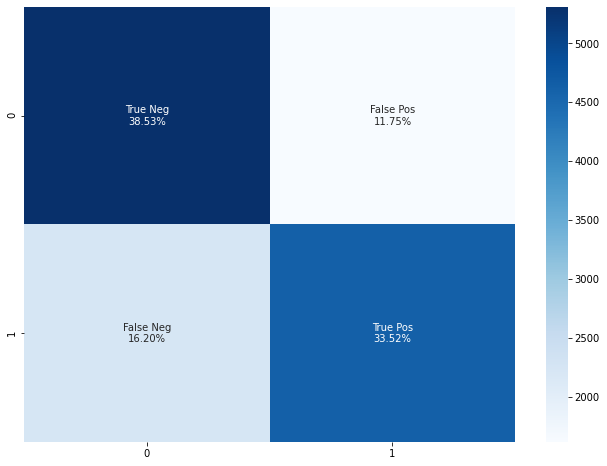

In [72]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
prob = model.predict_proba(X_test)

In [75]:
prob = prob[:, 1]

In [76]:
lr_auc = roc_auc_score(y_test,prob)

In [77]:
print("ROC AUC=%.3f"%(lr_auc))

ROC AUC=0.784


In [78]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

0.5287001457234268


In [79]:
# Artificial Neural Network 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import InputLayer

def create_clf(n_hidden,kernel,units):
    clf = Sequential()
    clf.add(InputLayer(input_shape=12))
    for layer in range(n_hidden):
        clf.add(Dense(units, kernel_initializer=kernel, activation='relu'))
    clf.add(Dropout(rate=0.3))
    clf.add(Dense(1, kernel_initializer=kernel, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return clf

seed = 1
np.random.seed(seed)

parameters = {
    'batch_size' : [32,64,128],
    'nb_epoch': [50,100],
    'n_hidden':[0,1,2,3],
    'kernel':['random_uniform'],
    'units':[8,12,24,30]
}

clf = KerasClassifier(build_fn=create_clf) #RandoomizedSearchCV for hyperparameter tuning the model

In [81]:
random_search = RandomizedSearchCV(estimator=clf,param_distributions=parameters,n_iter=20,n_jobs=-1,cv=5)
random_search.fit(X,Y)

/home/pop-user/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


2153/2153 [==============================] - 1s 353us/step - loss: 0.6413 - accuracy: 0.63500s - loss: 0.665


RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe758b76b80>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'kernel': ['random_uniform'],
                                        'n_hidden': [0, 1, 2, 3],
                                        'nb_epoch': [50, 100],
                                        'units': [8, 12, 24, 30]})

In [82]:
print('RandomizedSearch Best score',random_search.best_score_)
print('RandomizedSearch Best params',random_search.best_params_)
print('RandomizedSearch execution time',random_search.refit_time_)

RandomizedSearch Best score 0.7147232532501221
RandomizedSearch Best params {'units': 24, 'nb_epoch': 50, 'n_hidden': 1, 'kernel': 'random_uniform', 'batch_size': 32}
RandomizedSearch execution time 1.0842268466949463


In [83]:
nn_model = Sequential()
nn_model.add(InputLayer(input_shape=12))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
nn_model.add(Dropout(rate=0.3))
nn_model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [84]:
hist= nn_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
1378/1378 [==============================] - 1s 714us/step - loss: 0.6239 - accuracy: 0.6465 - rmse: 0.4656 - val_loss: 0.5681 - val_accuracy: 0.7173 - val_rmse: 0.4378
Epoch 2/50
1378/1378 [==============================] - 1s 550us/step - loss: 0.5796 - accuracy: 0.7102 - rmse: 0.4432 - val_loss: 0.5573 - val_accuracy: 0.7215 - val_rmse: 0.4330
Epoch 3/50
1378/1378 [==============================] - 1s 555us/step - loss: 0.5664 - accuracy: 0.7192 - rmse: 0.4364 - val_loss: 0.5705 - val_accuracy: 0.7171 - val_rmse: 0.4394
Epoch 4/50
1378/1378 [==============================] - 1s 534us/step - loss: 0.5693 - accuracy: 0.7204 - rmse: 0.4378 - val_loss: 0.5968 - val_accuracy: 0.6622 - val_rmse: 0.4530
Epoch 5/50
1378/1378 [==============================] - 1s 554us/step - loss: 0.5640 - accuracy: 0.7253 - rmse: 0.4348 - val_loss: 0.5475 - val_accuracy: 0.7253 - val_rmse: 0.4282
Epoch 6/50
1378/1378 [==============================] - 1s 554us/step - loss: 0.5606 - accuracy: 0.7

1378/1378 [==============================] - 1s 555us/step - loss: 0.5554 - accuracy: 0.7289 - rmse: 0.4310 - val_loss: 0.5524 - val_accuracy: 0.7269 - val_rmse: 0.4303
Epoch 47/50
1378/1378 [==============================] - 1s 540us/step - loss: 0.5527 - accuracy: 0.7295 - rmse: 0.4299 - val_loss: 0.5446 - val_accuracy: 0.7265 - val_rmse: 0.4268
Epoch 48/50
1378/1378 [==============================] - 1s 569us/step - loss: 0.5506 - accuracy: 0.7277 - rmse: 0.4291 - val_loss: 0.5464 - val_accuracy: 0.7285 - val_rmse: 0.4275
Epoch 49/50
1378/1378 [==============================] - 1s 545us/step - loss: 0.5536 - accuracy: 0.7307 - rmse: 0.4303 - val_loss: 0.5449 - val_accuracy: 0.7280 - val_rmse: 0.4270
Epoch 50/50
1378/1378 [==============================] - 1s 536us/step - loss: 0.5540 - accuracy: 0.7298 - rmse: 0.4305 - val_loss: 0.5464 - val_accuracy: 0.7274 - val_rmse: 0.4277


In [85]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


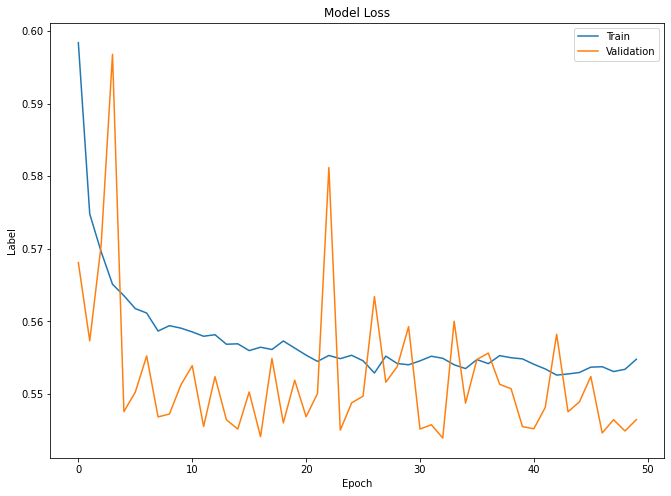

In [86]:
# Visualize the training loss and the validation loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Label")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

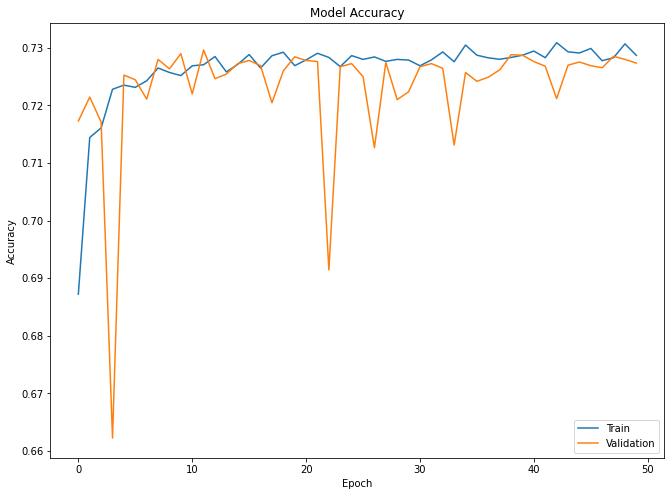

In [87]:
# Visualize the training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

In [88]:
nn_loss, nn_accuracy, nn_rmse = nn_model.evaluate(X,Y)

2153/2153 [==============================] - 1s 298us/step - loss: 0.5482 - accuracy: 0.7269 - rmse: 0.4284


In [89]:
print("Accuracy:",nn_accuracy)
print("\n Loss:",nn_loss)
print("\n Root Mean Squared Error:",nn_rmse)

Accuracy: 0.7269177436828613

 Loss: 0.5481746792793274

 Root Mean Squared Error: 0.4283859431743622


In [90]:
# Prediction
nn_prediction = nn_model.predict(X_test)

In [91]:
nn_prediction

array([[0.8380524 ],
       [0.2811798 ],
       [0.08067739],
       ...,
       [0.23643392],
       [0.05104911],
       [0.77691746]], dtype=float32)

In [92]:
nn_pred = [1 if y >= 0.5 else 0 for y in nn_prediction]

In [93]:
nn_pred

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [94]:
nn_rmse = mean_squared_error(y_test,nn_pred,squared=False)
print(nn_rmse)
# RMSE Score for validation

0.5283568116098601


In [95]:
from sklearn import metrics
print(metrics.classification_report(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      6927
           1       0.78      0.61      0.69      6850

    accuracy                           0.72     13777
   macro avg       0.73      0.72      0.72     13777
weighted avg       0.73      0.72      0.72     13777



In [96]:
# Confusion Matrix
nn_cnf_matrix = metrics.confusion_matrix(y_test, nn_pred)

In [97]:
nn_cnf_matrix

array([[5734, 1193],
       [2653, 4197]])

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, nn_pred))
print("Precision:",metrics.precision_score(y_test, nn_pred))
print("Recall:",metrics.recall_score(y_test, nn_pred))

Accuracy: 0.7208390796254627
Precision: 0.7786641929499072
Recall: 0.6127007299270073


<AxesSubplot:>

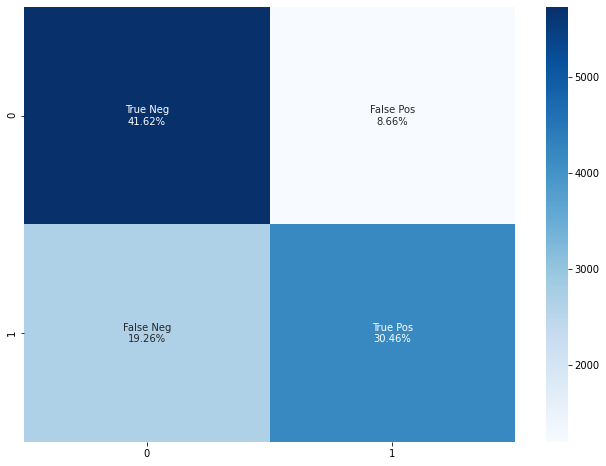

In [99]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ["{0:.2%}".format(value) for value in nn_cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nn_cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [101]:
y_pred_model = nn_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_model)

In [102]:
model_auc = auc(fpr_keras,tpr_keras)
model_auc

0.7924305294315379

In [103]:
#Export Models
import pickle

#export logistic regression model
lr_filename = 'finalized_lr_model.sav'
pickle.dump(model,open(lr_filename,'wb'))
print("Saved logistic regression model into lr_model.sav")

nn_model.save("model.h5")
print("Saved neural network model into model.h5")

Saved logistic regression model into lr_model.sav
Saved neural network model into model.h5
